## Practica 2 - Graficos Interactivos

#### Integrantes
- Juan Francisco Pelaez Becerra
- Diana Fernanda Tixi Uyaguari

#### Fecha: 13/05/2022

En base a los datos de las cohortes entregados previamente se deberá genera dos reportes según la asignación del docente.
Para el desarrollo de los resportes se utilizara los siguientes datos: 
* Area: Ciencias Administrativas y Economicas 
* Carrera: Telecomunicaciones

#### Instalacion de librerias necesarias para el funcionamiento

In [ ]:
#Librerias necesarias
!pip install ipywidgets

In [2]:
#Importamos las librerias Necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import plotly.graph_objects as go

##### 1. Cargamos los Dataset UPS - Cohorte 


In [11]:
#Leemos todos los csv
dfx = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2016_2017_49_marzo2022.xlsx') 
df1 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2017_2017_50_marzo2022.xlsx') 
df2 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2017_2018_51_marzo2022.xlsx')
df3 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2018_2018_52_marzo2022.xlsx')
df4 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2018_2019_53_marzo2022.xlsx')
df5 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2019_2019_54_marzo2022.xlsx')
df6 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2020_2019_55_marzo2022.xlsx')
df7 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2020_2020_56_marzo2022.xlsx')
df8 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2020_2021_57_marzo2022.xlsx')
df9 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2021_2021_58_marzo2022.xlsx')
df0 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2021_2022_59_marzo2022.xlsx')

##### 2. Creamos un solo datset con toda la informacion previamente cargada

In [12]:
#Concatenamos todos los archivos
df = pd.concat([dfx, df1, df2, df3, df4, df5, df6, df7, df8, df9, df0], ignore_index = True)
df.head()

,COHORTE,PERÍODO ACADÉMICO CURSA,SEDE,CAMPUS,CARRERA,ÁREA,MODALIDAD,TIPO PROYECTOEDUCATIVO,NRO ALUMNOS
0,2016 - 2017,2016 - 2017,GUAYAQUIL,CENTENARIO,COMPUTACIÓN,CIENCIA Y TECNOLOGÍA,PRESENCIAL,NUEVA O REDISEÑO,69
1,2016 - 2017,2016 - 2017,GUAYAQUIL,CENTENARIO,ELECTRICIDAD,CIENCIA Y TECNOLOGÍA,PRESENCIAL,NUEVA O REDISEÑO,50
2,2016 - 2017,2016 - 2017,MATRIZ CUENCA,EL VECINO,COMPUTACIÓN,CIENCIA Y TECNOLOGÍA,PRESENCIAL,NUEVA O REDISEÑO,124
3,2016 - 2017,2016 - 2017,MATRIZ CUENCA,EL VECINO,EDUCACIÓN BÁSICA,EDUCACION,PRESENCIAL,NUEVA O REDISEÑO,38
4,2016 - 2017,2016 - 2017,MATRIZ CUENCA,EL VECINO,EDUCACIÓN INICIAL,EDUCACION,PRESENCIAL,NUEVA O REDISEÑO,28


#### 3. Realizamos una preprocesamiento de los datos (limpieza), puesto que el cohorte 2022 -2022 no contiene informacion valiosa

In [6]:
#Limpieza de datos
df.drop(df[df['PERÍODO ACADÉMICO CURSA'] == '2022 - 2022'].index, inplace = True)
len(df.index)

2947

#### 4. Realizamos una limpieza de datos para verificar que no exita datos repetidos  

In [13]:
cohortes = df.COHORTE.unique()
sedes = df.SEDE.unique()
campus = df.CAMPUS.unique()
carreras = df.CARRERA.unique()

#### 5. Guardamos en un archivo csv la data preprocesada, par posteriormente utilizar este dataset con la informacion de nuestro interes

In [8]:
#Guardamos en un nuevo dataset todas los datos 
df.to_csv("DataUPS.csv", sep=";",index = False)

#### 6. Cargamos el nuevo dataset  

In [14]:
#Cargamos el dataset previamente guardado y preprocesado
df = pd.read_csv('DataUPS.csv', sep=";") 
df

,COHORTE,PERÍODO ACADÉMICO CURSA,SEDE,CAMPUS,CARRERA,ÁREA,MODALIDAD,TIPO PROYECTOEDUCATIVO,NRO ALUMNOS
0,2016 - 2017,2016 - 2017,GUAYAQUIL,CENTENARIO,COMPUTACIÓN,CIENCIA Y TECNOLOGÍA,PRESENCIAL,NUEVA O REDISEÑO,69
1,2016 - 2017,2016 - 2017,GUAYAQUIL,CENTENARIO,ELECTRICIDAD,CIENCIA Y TECNOLOGÍA,PRESENCIAL,NUEVA O REDISEÑO,50
2,2016 - 2017,2016 - 2017,MATRIZ CUENCA,EL VECINO,COMPUTACIÓN,CIENCIA Y TECNOLOGÍA,PRESENCIAL,NUEVA O REDISEÑO,124
3,2016 - 2017,2016 - 2017,MATRIZ CUENCA,EL VECINO,EDUCACIÓN BÁSICA,EDUCACION,PRESENCIAL,NUEVA O REDISEÑO,38
4,2016 - 2017,2016 - 2017,MATRIZ CUENCA,EL VECINO,EDUCACIÓN INICIAL,EDUCACION,PRESENCIAL,NUEVA O REDISEÑO,28
...,...,...,...,...,...,...,...,...,...
2942,2021 - 2022,2021 - 2022,QUITO,SUR,INGENIERÍA AUTOMOTRIZ,CIENCIA Y TECNOLOGÍA,PRESENCIAL,AJUSTE CURRICULAR / PROYECTOS DE CARRERA NUEVOS,122
2943,2021 - 2022,2021 - 2022,QUITO,SUR,INGENIERÍA CIVIL,CIENCIA Y TECNOLOGÍA,PRESENCIAL,AJUSTE CURRICULAR / PROYECTOS DE CARRERA NUEVOS,102
2944,2021 - 2022,2021 - 2022,QUITO,SUR,MECÁNICA,CIENCIA Y TECNOLOGÍA,PRESENCIAL,AJUSTE CURRICULAR / PROYECTOS DE CARRERA NUEVOS,27
2945,2021 - 2022,2021 - 2022,QUITO,SUR,MECATRÓNICA,CIENCIA Y TECNOLOGÍA,PRESENCIAL,AJUSTE CURRICULAR / PROYECTOS DE CARRERA NUEVOS,40


#### Reporte2  por Carrera - Telecomunicaciones 
Para la carrera asignada, mediante un check list permitir filtrar las cohortes que se desea visualizar (Considerar el uso de leyendas, puesto que en algunos casos la carrera estará presente en tres, dos o una sede)

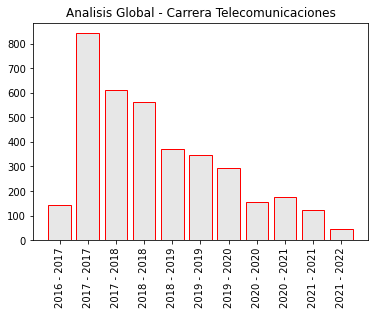

In [35]:
#Realizamos un analisis global de la carrera Telecomunicaciones
#Creamos un lista para guardar agregar el numero de alumnos por cohorte 
cohovalues = []
#recorremos la lista de los cohortes
for coho in cohortes:
    #
    dx = df.loc[(df['COHORTE'] == coho) & (df['CARRERA'] == 'TELECOMUNICACIONES')]
    carrer= df['CARRERA']
    cohovalues.append(dx['NRO ALUMNOS'].sum()) 

plt.figure()
plt.xticks(rotation = 90)
plt.title("Analisis Global - Carrera Telecomunicaciones")
barras = plt.bar(cohortes, cohovalues, color=(0.1, 0.1, 0.1, 0.1),edgecolor='red')

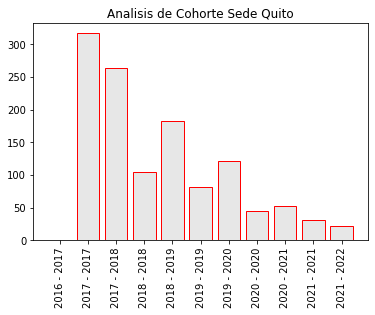

In [30]:
cohovalues = []
for coho in cohortes:
    dx = df.loc[(df['COHORTE'] == coho) & (df['CARRERA'] == 'TELECOMUNICACIONES') & (df['SEDE'] == 'QUITO')]
    carrer= df['CARRERA']
    cohovalues.append(dx['NRO ALUMNOS'].sum()) 

plt.figure()
plt.xticks(rotation = 90)
plt.title("Analisis de Cohorte Sede Quito")
barras = plt.bar(cohortes, cohovalues, color=(0.1, 0.1, 0.1, 0.1),edgecolor='red')

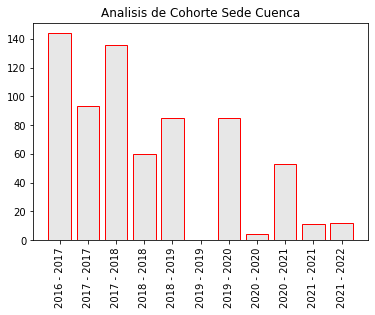

In [18]:
cohovalues = []
for coho in cohortes:
    dx = df.loc[(df['COHORTE'] == coho) & (df['CARRERA'] == 'TELECOMUNICACIONES') & (df['SEDE'] == 'MATRIZ CUENCA')]
    carrer= df['CARRERA']
    cohovalues.append(dx['NRO ALUMNOS'].sum()) 

plt.figure()
plt.xticks(rotation = 90)
plt.title("Analisis de Cohorte Sede Cuenca")
barras = plt.bar(cohortes, cohovalues, color=(0.1, 0.1, 0.1, 0.1),edgecolor='red')

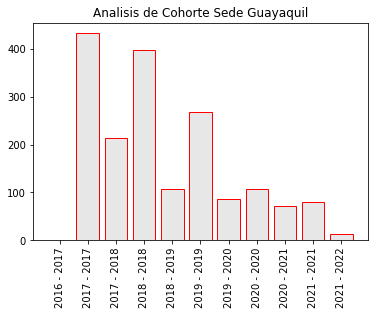

In [32]:
cohovalues = []
for coho in cohortes:
    dx = df.loc[(df['COHORTE'] == coho) & (df['CARRERA'] == 'TELECOMUNICACIONES') & (df['SEDE'] == 'GUAYAQUIL')]
    carrer= df['CARRERA']
    cohovalues.append(dx['NRO ALUMNOS'].sum()) 

plt.figure()
plt.xticks(rotation = 90)
plt.title("Analisis de Cohorte Sede Guayaquil")
barras = plt.bar(cohortes, cohovalues, color=(0.1, 0.1, 0.1, 0.1),edgecolor='red')

In [46]:
import plotly.graph_objects as px
import numpy as np
import plotly.graph_objects as go

x = cohortes

plot = px.Figure(
    data=[go.Bar(
    name='SEDE QUITO',
    x=x,
    y=cohovalues,
    text=cohovalues
),
    go.Bar(
    name='SEDE GUAYAQUIL',
    x=x,
    #textposition='auto',
    #y=woman_df.counts,
    #text=woman_df.counts
),
    go.Bar(
    name='SEDE CUENCA',
    x=x,
    #textposition='auto',
    #y=Nonbinary.counts,
    #text=Nonbinary.counts
)
])

plot.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            active=0,
            buttons=list([
                dict(label="ANALISIS GLOBAL",
                     method="update",
                     args=[{"visible": [True, True,True]},
                           {"title": "Analisis Global","text":"blue"}]),
                dict(label="SEDE QUITO",
                     method="update",
                     args=[{"visible": [True, False,False]},
                           {"title": "Analisis Sede Quito"
                            }]),
                dict(label="SEDE GUAYAQUIL",
                     method="update",
                     args=[{"visible": [False, True,False]},
                           {"title": "Analisis Guayaquil",
                            }]),
                dict(label="SEDE CUENCA",
                     method="update",
                     args=[{"visible": [False, False,True]},
                           {"title": "Analisis Quito",
                            }]),
            ]),
        )
    ]
,width=1000,
    height=700,
    autosize=False,
    margin=dict(t=0, b=0, l=0, r=0),
    #template="seaborn",
    #xaxis={'tickangle': 30}
)
plot.update_layout(title="Cohortes Carrera Telecomunicaciones", title_x=0.5, title_y=1)
plot.show()